In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
variable = pd.read_csv(r"C:\Users\cdot\Downloads\M1_final.csv")

In [3]:
variable.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
variable.shape

(28820, 23)

In [5]:
X = variable.drop(columns = 'TAXI_OUT',axis=1)
Y = variable['TAXI_OUT']

In [6]:
print("Shape of X is",X.shape)
print("Shape of Y is",Y.shape)

Shape of X is (28820, 22)
Shape of Y is (28820,)


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [8]:
X['OP_UNIQUE_CARRIER']=LE.fit_transform(X['OP_UNIQUE_CARRIER'])
X['TAIL_NUM']=LE.fit_transform(X['TAIL_NUM'])
X['DEST']=LE.fit_transform(X['DEST'])
X['Wind']=LE.fit_transform(X['Wind'].astype(str))
X['Condition']=LE.fit_transform(X['Condition'])

In [9]:
# training and testing the data

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=1)

In [11]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(25938, 22) (2882, 22) (25938,) (2882,)


In [12]:
rmse=np.empty(8,dtype=float)
#creating array to store mse

# 1.Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lng=LinearRegression()
lng.fit(X_train,Y_train)
pred1 = lng.predict(X_test)
rmse[0] = mean_squared_error(Y_test,pred1)**0.5
print(rmse[0])

6.507425087582124


# 2. Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.05,normalize = True)
ridge.fit(X_train,Y_train)
pred2 = ridge.predict(X_test)
rmse[1] = mean_squared_error(Y_test,pred2)**0.5
print(rmse[1])

6.5293151681677255


# 3. Lasso Regression

In [15]:
from sklearn.linear_model import Lasso
lasreg=Lasso(alpha=0.03, normalize=True)
lasreg.fit(X_train,Y_train)
pred3=lasreg.predict(X_test)
rmse[2]=mean_squared_error(Y_test,pred3)**0.5
print(rmse[2])

6.832364662675594


# KNN Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=100)
KNN.fit(X_train,Y_train)
pred4=KNN.predict(X_test)
rmse[3]=mean_squared_error(Y_test,pred4)**0.5
print(rmse[3])

6.632433757702544


# SVM Regression

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
std = StandardScaler()
std_X_train = X_train.copy()
std_X_train = std.fit_transform(std_X_train)
std_X_test = X_test.copy()
std_X_test = std.fit_transform(std_X_test)
svr = SVR()
svr.fit(std_X_train,Y_train)
pred5 = svr.predict(std_X_test)
rmse[4]=mean_squared_error(Y_test,pred5)**0.5
print(rmse[4])

6.243031999767116


# Naive Bayes Regression

In [18]:
from sklearn.linear_model import BayesianRidge
NB=BayesianRidge()
NB.fit(X_train,Y_train)
pred6=NB.predict(X_test)
rmse[5]=mean_squared_error(Y_test,pred6)**0.5
print(rmse[5])

6.514038406947584


# Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor
RanFor=RandomForestRegressor()
RanFor.fit(X_train,Y_train)
pred7=RanFor.predict(X_test)
rmse[6]=mean_squared_error(Y_test,pred7)**0.5
print(rmse[6])

5.626076132700023


# LightGBM

In [20]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
# Dew point field is producing error hence dropped the coloumn

In [21]:
X_lgbm_train=X_train.drop("Dew Point",axis=1).copy()
X_lgbm_test=X_test.drop("Dew Point",axis=1).copy()
lgbm.fit(X_lgbm_train,Y_train)
pred8 = lgbm.predict(X_lgbm_test)
rmse[7] = mean_squared_error(Y_test,pred8)**0.5
print(rmse[7])

5.728006919772796


# One Hot Encoding

In [22]:
X1 = variable.drop(columns = 'TAXI_OUT',axis=1)
Y1 = variable['TAXI_OUT']

In [23]:
variable.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13
28819,1,31,5,B6,N958JB,BQN,-1,225,1576,1439,...,38,96,N,6,0,30.18,Cloudy,19,23,15


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X1 = pd.get_dummies(X1, columns = ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_UNIQUE_CARRIER','DEST'])
X1['TAIL_NUM']=LE.fit_transform(X1['TAIL_NUM'])
X1['Wind']=LE.fit_transform(X1['Wind'].astype(str))
X1['Condition']=LE.fit_transform(X1['Condition'])
#had to label encode these 3 coloumns for accurate model

In [25]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.1,random_state=1)

In [26]:
print(X1_train)

       TAIL_NUM  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  DEP_TIME_M  \
12993       488         -5                85       187       1034        1029   
27224      1201         -3               411      2586        580         577   
17691      1708         -5               126       427       1181        1176   
27466       457         -7                88       301       1370        1363   
4622        542        -14               192      1089        485         471   
...         ...        ...               ...       ...        ...         ...   
10955      1644        -10               100       266       1320        1310   
17289       531         -3               183       944        994         991   
5192       1211         -5               412      2586       1199        1194   
12172         8         -2               384      2475       1320        1318   
235         242         33               188      1069       1130        1163   

       CRS_ARR_M  Temperatu

In [27]:
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(25938, 132) (2882, 132) (25938,) (2882,)


In [28]:
# data has been one hot encoded

In [29]:
rmseh=np.empty(8,dtype=float)

# Linear Regression 

In [30]:
lng.fit(X1_train,Y1_train)
predo1=lng.predict(X1_test)
rmseh[0]=mean_squared_error(Y1_test,predo1)**0.5
print(rmseh[0])

6.281311894533952


# Ridge Regression

In [31]:
ridge.fit(X1_train,Y1_train)
predo2 = ridge.predict(X1_test)
rmseh[1] = mean_squared_error(Y1_test,predo2)**0.5
print(rmseh[1])

6.290727692502077


# Lasso Regression

In [32]:
lasreg.fit(X1_train,Y1_train)
predo3=lasreg.predict(X1_test)
rmseh[2]=mean_squared_error(Y1_test,predo3)**0.5
print(rmseh[2])

6.832364662675594


# KNN Regression

In [33]:
KNN=KNeighborsRegressor(n_neighbors=100)
KNN.fit(X1_train,Y1_train)
predo4=KNN.predict(X1_test)
rmseh[3]=mean_squared_error(Y1_test,predo4)**0.5
print(rmseh[3])

6.63393776924101


# SVM Regression

In [34]:

std_X1_train = X1_train.copy()
std_X1_train = std.fit_transform(std_X1_train)
std_X1_test = X1_test.copy()
std_X1_test = std.fit_transform(std_X1_test)
svr.fit(std_X1_train,Y1_train)
predo5 = svr.predict(std_X1_test)
rmseh[4]=mean_squared_error(Y1_test,predo5)**0.5
print(rmseh[4])

6.237982627722775


#  Naive Bayes

In [35]:
NB.fit(X1_train,Y1_train)
predo6=NB.predict(X1_test)
rmseh[5]=mean_squared_error(Y1_test,predo6)**0.5
print(rmseh[5])

6.283505972266983


# Random Forest Regression

In [36]:
RanFor.fit(X1_train,Y1_train)
predo7=RanFor.predict(X1_test)
rmseh[6]=mean_squared_error(Y1_test,predo7)**0.5
print(rmseh[6])

5.564628666220377


# LightGBM

In [37]:
X1_lgbm_train=X1_train.drop("Dew Point",axis=1).copy()
X1_lgbm_test=X1_test.drop("Dew Point",axis=1).copy()
lgbm.fit(X1_lgbm_train,Y1_train)
predo8 = lgbm.predict(X1_lgbm_test)
rmseh[7] = mean_squared_error(Y1_test,predo8)**0.5
print(rmseh[7])

5.708834864866667


Text(0, 0.5, 'Root Mean Squared Error')

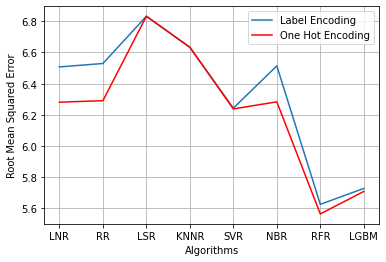

In [38]:
algos=["LNR","RR","LSR","KNNR","SVR","NBR","RFR","LGBM"]
plt.plot(algos,rmse)
plt.plot(algos,rmseh,'r')
plt.legend(["Label Encoding","One Hot Encoding"])
plt.grid()
plt.xlabel("Algorithms")
plt.ylabel("Root Mean Squared Error")